## Neural Network for Handwritten Digits Classification

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

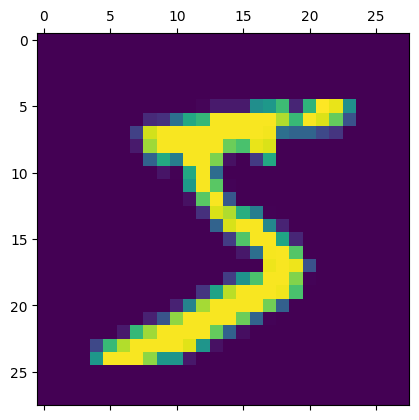

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
# Reshaping records to 1D array and scaling by dividing 255

X_train_flattened = X_train.reshape(len(X_train), 28*28) / 255
X_test_flattened = X_test.reshape(len(X_test), 28*28) / 255

In [9]:
X_train_flattened.shape

(60000, 784)

In [10]:
X_test_flattened.shape

(10000, 784)

### Neural Network

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [12]:
model = Sequential([
    Input(shape=(784,)),
    Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8208 - loss: 0.7045
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9131 - loss: 0.3118
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9224 - loss: 0.2808
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9243 - loss: 0.2727
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9256 - loss: 0.2656


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9129 - loss: 0.3040


[0.26843443512916565, 0.9247999787330627]

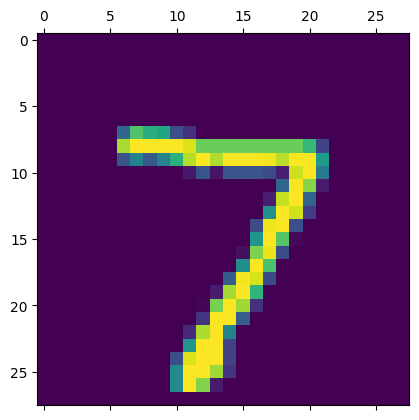

In [15]:
plt.matshow(X_test[0])

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([2.8943500e-02, 2.6185600e-07, 3.8912483e-02, 9.4962728e-01,
       1.9997482e-03, 6.8717368e-02, 1.2549601e-06, 9.9973840e-01,
       7.6340280e-02, 5.7523185e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

### Confusion Matrix

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [  10,    9,  920,   18,   10,    3,   13,   10,   35,    4],
       [   4,    0,   18,  930,    0,   18,    2,   11,   19,    8],
       [   2,    1,    5,    1,  926,    0,    7,    3,    9,   28],
       [  12,    3,    3,   43,   11,  765,   13,    6,   31,    5],
       [  16,    3,    8,    1,    8,   13,  905,    2,    2,    0],
       [   2,    6,   21,    7,    8,    0,    0,  950,    2,   32],
       [  13,   10,    7,   23,    9,   22,    8,   12,  864,    6],
       [  11,    7,    1,    9,   36,    7,    0,   23,    7,  908]])>

Text(95.72222222222221, 0.5, 'Truth')

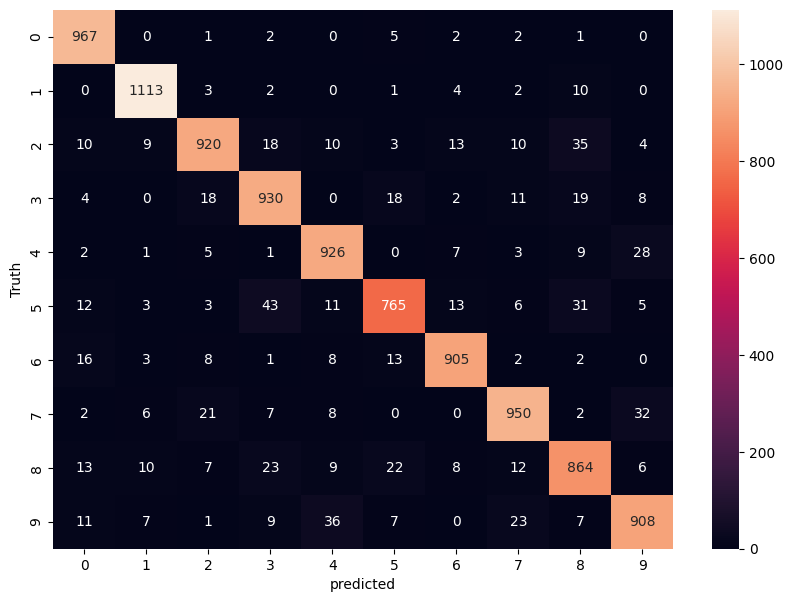

In [21]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

### Adding a hidden layer

In [25]:
model = Sequential([
    Input(shape=(784,)),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
model.fit(X_train_flattened, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8752 - loss: 0.4439
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9604 - loss: 0.1353
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9749 - loss: 0.0868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9800 - loss: 0.0653
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9852 - loss: 0.0491


In [24]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9714 - loss: 0.0953


[0.08283903449773788, 0.9750999808311462]